#### Imports

In [6]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf

#### Function that Saves Stock Data to CSV

In [7]:
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)

    df = web.DataReader(ticker, 'yahoo', start, end)
# Saving the file from internet to the computer (to file path Ctrl+L in the folder)
    df.to_csv("/home/johnson/DSML/Finance.py/" + ticker + ".csv")
    return df
# Test with the test function.

#### Function that Returns a Dataframe from CSV

In [10]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv("/home/johnson/DSML/Finance.py/" + ticker + ".csv")

    except FileNotFoundError:
        print("File doesn't Exists")
    else:
        return df

#### Add Daily Return to Dataframe

In [12]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price or (EP/BP)-1

def add_daily_return_to_df(df, ticker):
     df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
     df.to_csv("/home/johnson/DSML/Finance.py/" + ticker + ".csv")
     return df

#### Returns Total Return over Time

In [18]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear} - {smonth} - {sday}"
    end = f"{eyear} - {emonth} - {eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    mask = (df['Date'] >= start) & (df['Date'] <=end) 
    daily_ret = df.loc[mask]['daily_return'].mean()
    df2 = df.loc[mask]
    days = df2.shape[0]
    return(days * daily_ret)

#### Matplotlib Finance

In [23]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear} - {smonth} - {sday}"
    end = f"{eyear} - {emonth} - {eday}"
    try:
        df = pd.read_csv("/home/johnson/DSML/Finance.py/" + ticker + ".csv")

    except FileNotFoundError:
        print("File doesn't Exists")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        mpf.plot(df_sub, type = 'candle')
        mpf.plot(df_sub, type = 'line')
        mpf.plot(df_sub, type = 'ohlc', mav = 4)

        s = mpf.make_mpf_style(base_mpf_style = 'charles', rc = {'font.size': 8})
        fig = mpf.figure(figsize=(12, 8), style = s)
        ax = fig.add_subplot(2, 1, 2)
        av = fig.add_subplot(2, 1, 2, sharex = ax)
        mpf.plot(df_sub, type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)


#### Test Function

Total Return:  0.05249787088944713


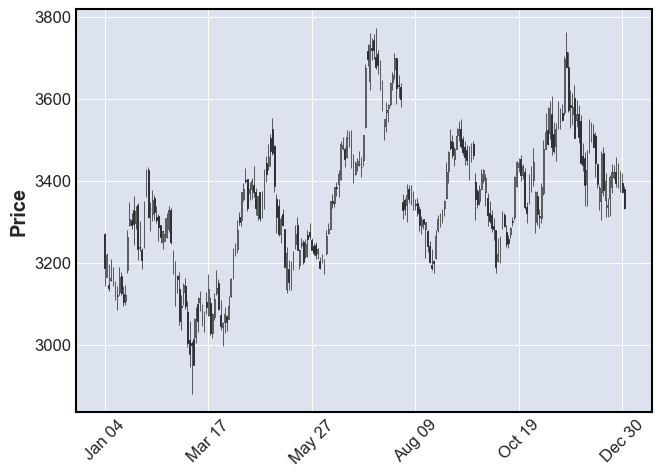

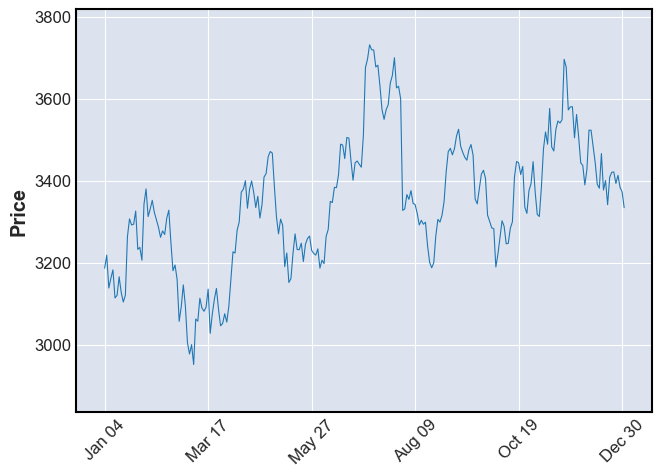

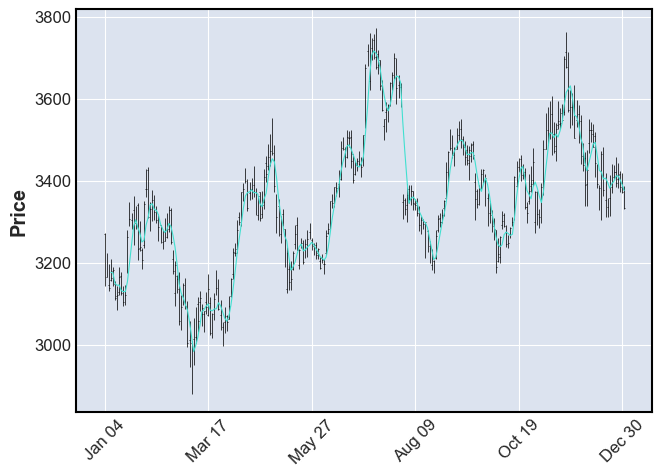

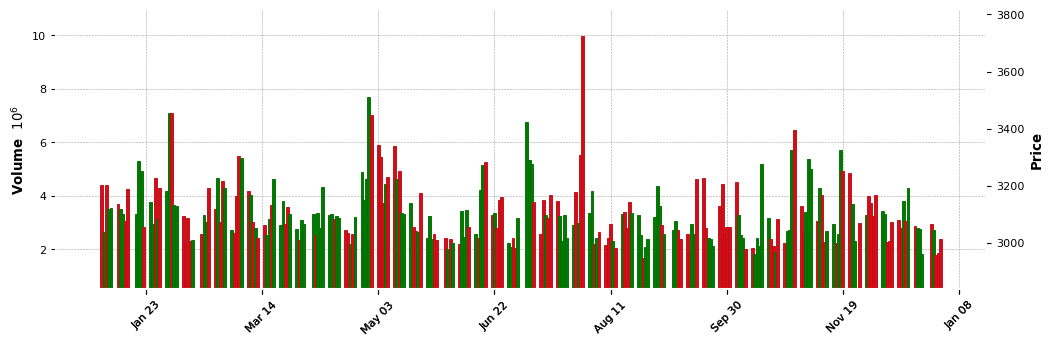

In [24]:
save_to_csv_from_yahoo('AMZN', 2021, 1, 1, 2022, 1, 1)

AMZN = get_df_from_csv('AMZN')

add_daily_return_to_df(AMZN, 'AMZN')

AMZN
tot_ret = get_return_defined_time(AMZN, 2021, 1, 1, 2022, 1, 1)
print("Total Return: ", tot_ret)

mplfinance_plot('AMZN', 'ohlc', 2021, 1, 1, 2022, 1, 1)